In [1]:
#import dependencies

import matplotlib.pyplot as plt
from pprint import pprint
import json
import random
import numpy as np
import pandas as pd
from owm_api import key
from citipy import citipy
import requests

In [22]:
# Step 1: Generate list of random cities

#Use random to generate a list of lat + long.
#Use citipy to find nearest city to coordinates

cities = []

#this acts as a check to ensure that the generated city in loop is not a repeat
unique_cities_check = []

#Below loop makes up to 10,000 attempts to generate list of 1000 cities with
#random lat/long generation and CitiPy's nearest_city().
#Random coordinate generation results in many duplicates, due the likelihood of
#the 'nearest city' being on an island in the middle of the ocean or on the edge of continents.
#Reaching the desired number of cities takes roughly 3x the iterations.
#E.g. generating 500 cities takes roughly 1500 iterations.
#10,000 attempts should be sufficient to generate 1000 cities and the loop should only run
#around 3000 times.

#I also expect about 13% of CitiPy generated cities to throw an error when plugged into the
#Open Weather Map API city search, leaving me with a final sample of roughly 870 cities.

#One of the problem parameters is at least 500 cities.
#I could hardcode failsafe to run additional cities if final number of cities is <500
#but it's simpler to generate enough cities that falling below 500 is very unlikely.

for i in range(10000):

    if len(cities) < 1000:
        lat = random.uniform(-90.0,90.0)
        long = random.uniform(-180.0,180.0)
        
        city = citipy.nearest_city(lat,long)
        
        city_country = city.city_name + ' ' + city.country_code
        
        if city_country not in unique_cities_check:
            unique_cities_check.append(city_country)
            cities.append([city.city_name, city.country_code])
                    
    else:
        break

In [9]:
# Step 2
# Generate weather data based on the city and country data from OpenWeatherMap API

url = 'https://api.openweathermap.org/data/2.5/weather'

#Weather outputs
weather_data_list = []

for i in range(len(cities)):
    city = cities[i][0]
    country = cities[i][1]
        
    query_params={'q': city + ',' + country,
                  'units': 'imperial',
                  'appid': key}
    
    response = requests.get(url, params = query_params).json()

    #try-except because not every city in CityPy is found in OWM, about 13% attrition from the 1000 in the cities list
    try:
        weather_data_list.append({'City': city,
                                  'Country': country,
                                  'Longitude': response['coord']['lon'], 
                                  'Latitude': response['coord']['lat'],
                                  'Max Temperature': response['main']['temp_max'],
                                  'Humidity': response['main']['humidity'],
                                  'Cloud Cover': response['clouds']['all'],
                                  'Wind Speed': response['wind']['speed']
                                 })
        
    except:
        pass

In [10]:
#Convert to dataframe

cities_df = pd.DataFrame(weather_data_list)

cities_df = cities_df[['City',
                       'Country',
                       'Longitude',
                       'Latitude',
                       'Max Temperature',
                       'Humidity',
                       'Cloud Cover',
                       'Wind Speed']]

cities_df.head()

,City,Country,Longitude,Latitude,Max Temperature,Humidity,Cloud Cover,Wind Speed
0,viedma,ar,-62.99,-40.81,53.12,43,20,12.24
1,khatanga,ru,102.47,71.98,48.35,70,56,7.54
2,hilo,us,-155.08,19.71,80.60,65,1,10.29
3,bambous virieux,mu,57.76,-20.34,71.75,94,24,6.98
4,likasi,cd,26.74,-10.99,57.80,83,0,8.10


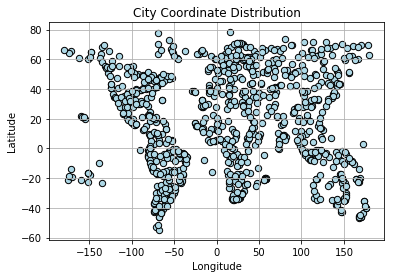

In [21]:
cities_df.plot.scatter('Longitude', 
                       'Latitude',
                       title='City Coordinate Distribution',
                       s=40,
                       color='LightBlue',
                       edgecolor='Black',
                       grid=True) 

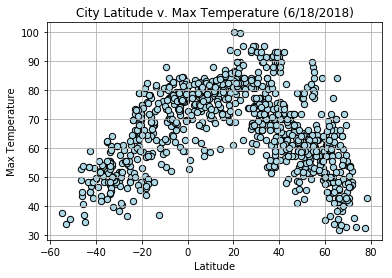

In [12]:
cities_df.plot.scatter('Latitude', 
                       'Max Temperature', 
                       title='City Latitude v. Max Temperature (6/18/2018)', 
                       marker='o', 
                       s=40, 
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)

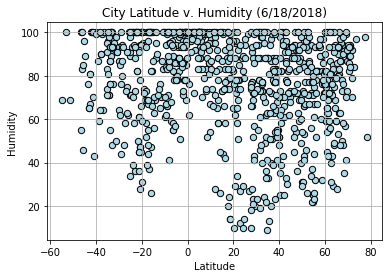

In [13]:
cities_df.plot.scatter('Latitude', 
                       'Humidity', 
                       title='City Latitude v. Humidity (6/18/2018)', 
                       marker='o', 
                       s=40, 
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)

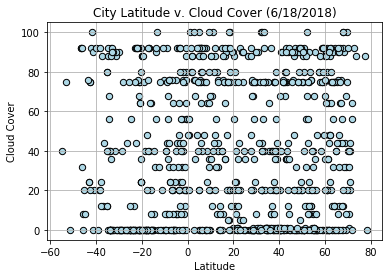

In [14]:
cities_df.plot.scatter('Latitude', 
                       'Cloud Cover', 
                       title='City Latitude v. Cloud Cover (6/18/2018)', 
                       marker='o', 
                       s=40, 
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)

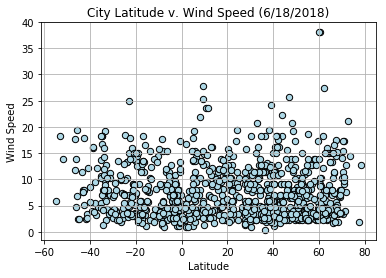

In [23]:
cities_df.plot.scatter('Latitude', 
                       'Wind Speed', 
                       title='City Latitude v. Wind Speed (6/18/2018)', 
                       marker='o', 
                       s=40, 
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)